{'1101': 262, '0001': 180, '1100': 66, '0000': 180, '1110': 51, '0010': 195, '1111': 66}


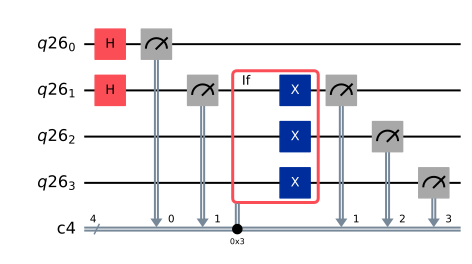

In [10]:

from qiskit import QuantumCircuit


from qiskit import *
from qiskit.visualization import plot_histogram
qubits = QuantumRegister(4)
clbits = ClassicalRegister(4)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2, q3) = qubits
(c0, c1, c2,c3) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.if_test((clbits, 0b0011)):
    circuit.x(q1)
    circuit.x(q2)
    circuit.x(q3)
circuit.measure(q1, c1)
circuit.measure(q2,c2)
circuit.measure(q3,c3)
backend = Aer.get_backend('qasm_simulator') # the device to run on
circ = circuit.compose(circuit)
result = backend.run(circ, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

with open('counts.txt', 'w') as file:
    for key, value in counts.items():
        file.write(f"{key}: {value}\n")
circuit.draw("mpl")
 
# example output counts: {'101': 269, '011': 260, '000': 252, '010': 243}

{'0001': 277, '0000': 238, '0010': 239, '1101': 246}


C:\Users\Hachi\AppData\Local\Temp\ipykernel_35796\2309915424.py:34: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


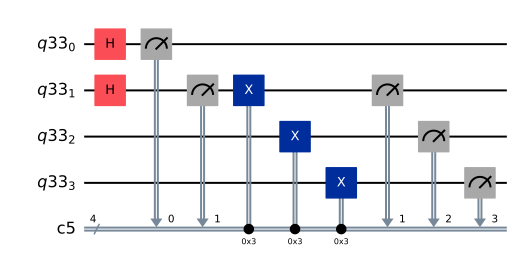

In [11]:
from qiskit import QuantumCircuit,transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
# Define quantum and classical registers
qubits = QuantumRegister(4)
clbits = ClassicalRegister(4)

# Create quantum circuit
circuit = QuantumCircuit(qubits, clbits)

# Apply Hadamard gates to q0 and q1
circuit.h([qubits[0], qubits[1]])

# Measure q0 and q1
circuit.measure(qubits[0], clbits[0])
circuit.measure(qubits[1], clbits[1])

# Apply conditional X gates based on measurement outcomes
circuit.x(qubits[1]).c_if(clbits, 0b0011)
circuit.x(qubits[2]).c_if(clbits, 0b0011)
circuit.x(qubits[3]).c_if(clbits, 0b0011)

# Measure qubits q1, q2, and q3
circuit.measure(qubits[1], clbits[1])
circuit.measure(qubits[2], clbits[2])
circuit.measure(qubits[3], clbits[3])

# Select backend
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit
compiled_circuit = transpile(circuit, backend)
qobj = assemble(compiled_circuit, shots=1000)
result = backend.run(qobj).result()

# Get counts
counts = result.get_counts()

# Print counts
print(counts)

# Save counts to a text file
with open('counts.txt', 'w') as file:
    for key, value in counts.items():
        file.write(f"{key}: {value}\n")

# Plot the circuit
circuit.draw("mpl")
